# Lise - AJT / EXPLORATION DES SEUILS (P1 3-7/02/2024)
***
_Les parties indispensables à run sont indiquées avec la mention [TO RUN], afin de reproduire les analyses se situant sous ces sections._

Ce notebook contient des analyses simples et très exploratoires (très peu de dataviz) - _le but étant la prise en main du sujet_, qui ont néanmoins permis de relever plusieurs observations et de soulever certaines interrogations pour la suite de la tâche (voir résumés par sections). 

## Infos du PDF eau-distrib-documentation

***

UDI = Unité de distribution d'eau. Ensemble de canalisations de distribution de l’eau potable au sein duquel la qualité de l’eau délivrée est considérée comme homogène. La France compte plus de 25 300 unités de distribution.
Peuvent englober les réseaux de distribution d'eau dans tout ou partie d'une ou plusieurs communes, suivant la situation locale. 
Eau du robinet recouvre 3 types d'installation dont UDI, donc ici on ne regarde que l'eau distribuée par commune a priori. 

En France, les exigences de qualité sont classées en deux groupes :
* des __limites de qualité__ pour les paramètres dont la présence dans l’eau induit des risques immédiats ou à plus ou moins long terme pour la santé de la population. Ces limites de qualité concernent, d’une part, les paramètres microbiologiques et d’autre part, une trentaine de substances indésirables ou toxiques (nitrates, métaux, solvants chlorés, hydrocarbures aromatiques, pesticides, sous-produits de désinfection, etc.).
* des __références de qualité__ pour une vingtaine de paramètres indicateurs de qualité, témoins du fonctionnement des installations de production et de distribution. Ces substances, qui n’ont pas d’incidence directe sur la santé aux teneurs normalement présentes dans l’eau, peuvent mettre en évidence un dysfonctionnement des installations de traitement ou être à l’origine d’inconfort ou de désagrément pour le consommateur.


Valeurs:
*  plvconformitebacterio
Valeurs possibles : "blanc", "C=conforme", "N=non conforme", "S (sans objet lorsqu'aucun paramètre microbio n'a été mesuré)".
* chimique:
Valeurs possibles : "blanc", "C=conforme", "N=non conforme", "D=conforme dans le cadre d’une dérogation","S (sans objet lorsqu'aucun paramètre chimique n'a été mesuré)".

## [TO RUN] Import Tables depuis la BDD

In [385]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import duckdb


In [4]:
# Connexion à la base 
con = duckdb.connect(database="./../../database/data.duckdb", read_only=True)

In [5]:
# Tables dispo dans la bdd
tables = con.execute("SHOW TABLES").df()

print(tables)

                name
0      sise_communes
1  sise_prelevements
2     sise_resultats


In [6]:
# TO RUN 
communes = con.table("sise_communes").to_df()
prelevements = con.table("sise_prelevements").to_df()
resultats = con.table("sise_resultats").to_df()

## Vision globale des tables 
***
=> info / head de chaque table pour prendre connaissance de leurs structures. 

In [7]:
communes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49536 entries, 0 to 49535
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   inseecommune  49536 non-null  object        
 1   nomcommune    49536 non-null  object        
 2   quartier      49536 non-null  object        
 3   cdreseau      49536 non-null  object        
 4   nomreseau     49536 non-null  object        
 5   debutalim     49536 non-null  datetime64[us]
dtypes: datetime64[us](1), object(5)
memory usage: 2.3+ MB


In [16]:
communes.head()

,inseecommune,nomcommune,quartier,cdreseau,nomreseau,debutalim
0,01001,ABERGEMENT-CLEMENCIAT (L'),-,001000556,BDS ST DIDIER/CHALARONNE,2010-09-07
1,01002,ABERGEMENT-DE-VAREY (L'),-,001000369,L'ABERGEMENT-DE-VAREY,2010-09-07
2,01004,AMBERIEU-EN-BUGEY,Vareilles,001000248,AMBERIEU VAREILLES,2010-09-07
3,01004,AMBERIEU-EN-BUGEY,St Germain_Brédevent,001000249,AMBERIEU SAINT GERMAIN DOUVRES,2010-09-07
4,01004,AMBERIEU-EN-BUGEY,ville,001000251,AMBERIEU VILLE,2010-09-07


In [22]:
prelevements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416128 entries, 0 to 416127
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   cddept                      416128 non-null  object        
 1   cdreseau                    416128 non-null  object        
 2   inseecommuneprinc           416128 non-null  object        
 3   nomcommuneprinc             416128 non-null  object        
 4   cdreseauamont               198587 non-null  object        
 5   nomreseauamont              198587 non-null  object        
 6   pourcentdebit               180524 non-null  object        
 7   referenceprel               416128 non-null  object        
 8   dateprel                    416128 non-null  datetime64[us]
 9   heureprel                   415870 non-null  object        
 10  conclusionprel              416122 non-null  object        
 11  ugelib                      416128 non-

In [18]:
prelevements.head()

,cddept,cdreseau,inseecommuneprinc,nomcommuneprinc,cdreseauamont,nomreseauamont,pourcentdebit,referenceprel,dateprel,heureprel,conclusionprel,ugelib,distrlib,moalib,plvconformitebacterio,plvconformitechimique,plvconformitereferencebact,plvconformitereferencechim
0,001,001000003,01007,AMBRONAY,None,None,None,00100139034,2024-01-23,11h27,Eau d'alimentation conforme aux limites de qua...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,N,C
1,001,001000003,01007,AMBRONAY,None,None,None,00100139393,2024-02-13,12h49,Eau d'alimentation conforme aux exigences de q...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,C,C
2,001,001000003,01007,AMBRONAY,001001304,TTP (CLG) AMBRONAY,100 %,00100139969,2024-03-13,10h46,Eau d'alimentation conforme aux exigences de q...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,C,C
3,001,001000003,01007,AMBRONAY,None,None,None,00100140209,2024-04-05,07h27,Eau d'alimentation conforme aux exigences de q...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,C,C
4,001,001000003,01007,AMBRONAY,None,None,None,00100140543,2024-05-13,12h43,Eau d'alimentation conforme aux exigences de q...,SYND. EAUX REGION D'AMBERIEU-EN-B,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,SERA - SYNDICAT DES EAUX DE LA REGION D'AMBERI...,C,C,C,C


In [19]:
resultats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386451 entries, 0 to 12386450
Data columns (total 17 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   cddept                    object 
 1   referenceprel             object 
 2   cdparametresiseeaux       object 
 3   cdparametre               float64
 4   libmajparametre           object 
 5   libminparametre           object 
 6   libwebparametre           object 
 7   qualitparam               object 
 8   insituana                 object 
 9   rqana                     object 
 10  cdunitereferencesiseeaux  object 
 11  cdunitereference          object 
 12  limitequal                object 
 13  refqual                   object 
 14  valtraduite               float64
 15  casparam                  object 
 16  referenceanl              object 
dtypes: float64(2), object(15)
memory usage: 1.6+ GB


In [21]:
resultats.head()

,cddept,referenceprel,cdparametresiseeaux,cdparametre,libmajparametre,libminparametre,libwebparametre,qualitparam,insituana,rqana,cdunitereferencesiseeaux,cdunitereference,limitequal,refqual,valtraduite,casparam,referenceanl
0,001,00100138503,ALTMICR,1370.0,ALUMINIUM TOTAL µG/L,Aluminium total µg/l,None,N,L,<10,µg/L,133,None,<=200 µg/L,0.00,7429-90-5,00100147233
1,001,00100138503,ASP,6489.0,ASPECT (QUALITATIF),Aspect (qualitatif),None,O,L,Aspect normal,SANS OBJET,X,None,None,0.00,None,00100147232
2,001,00100138503,ASP,6489.0,ASPECT (QUALITATIF),Aspect (qualitatif),None,O,L,Aspect normal,SANS OBJET,X,None,None,0.00,None,00100147233
3,001,00100138503,CL2LIB,1398.0,CHLORE LIBRE,Chlore libre,None,N,T,"0,30",mg(Cl2)/L,165,None,None,0.30,None,None
4,001,00100138503,CL2TOT,1399.0,CHLORE TOTAL,Chlore total,None,N,T,"0,34",mg(Cl2)/L,165,None,None,0.34,None,None


## Checks généraux tables:
***

=> Explorations simples de différentes variables sur les trois tables, et les observations qu'on peut déjà en tirer. 

__Résumé (exploration des variables):__
* On a moins de 35000 codes insee pour 32,5k communes. 
* 1482 communes homonymes (à vérifier en cross check avec source officielle sur les municipalités). Ou peut-être représentent des cantons (regroupement de plusieurs anciennes communes ?). 
Par exemple une rapide recherche montre l'existence de plusieurs communes au nom de Sainte-Colombe: https://fr.wikipedia.org/wiki/Sainte-Colombe
Dans tous les cas, privilégier le code insee pour catégoriser par municipalité, plutôt que le nom de commune. 

* Plusieurs réseaux par département mais pourquoi pas faire des analyses de contaminants par réseau.

* 49k entrées pour la table communes vs 41.6k pour les prélèvements, qui elle-même n'est pas complète notamment pour les variables nomreseauamont, pourcentdebit...
* Prélèvements sur 98% des communes mais uniquement sur l'année 2024.
* Pourcentage de cas non conformes: 18.2 % (total de la table prélèvement). 

* Différents types de conformités (+ voir doc): limites de qualité & références de qualité
* Les variables de conformité font référence au prélèvement global, non à chaque molécule (pour le détail par molécule voir analyse des dépassements de seuils). 
    
/!\ __Parmi les cas conformes, on a quand même des recommandations (ex: présence de perchlorates --> déconseillée aux nourrisons...")__

### COMMUNES

#### Noms vs Codes communes

In [26]:
communes['nomcommune'].nunique()

32502

In [27]:
communes['inseecommune'].nunique()

34809

In [38]:
duplic_communes = communes.groupby('nomcommune')['inseecommune'].nunique().reset_index().sort_values(by = 'inseecommune', ascending = False)



In [39]:
duplic_communes[duplic_communes['inseecommune'] > 1]

,nomcommune,inseecommune
27011,SAINTE-COLOMBE,12
26656,SAINT-SAUVEUR,11
26546,SAINT-REMY,10
24028,SAINT-AUBIN,10
2432,BEAULIEU,10
...,...,...
2557,BEAUVOISIN,2
14368,LAGARRIGUE,2
31796,VILLIERS,2
10634,FERRIERE (LA),2


In [42]:
communes[communes['nomcommune'] == 'SAINTE-COLOMBE']

,inseecommune,nomcommune,quartier,cdreseau,nomreseau,debutalim
2666,05135,SAINTE-COLOMBE,-,005001294,SAINTE COLOMBE CHEF LIEU,2010-08-07
2667,05135,SAINTE-COLOMBE,-,005001295,LES BEGUES (STE COLOMBE),2010-08-07
9023,17319,SAINTE-COLOMBE,totalité,017000475,R. DE MONTLIEU-MONTGUYON,2010-09-15
12759,25515,SAINTE-COLOMBE,-,025000744,CCGP SAINTE COLOMBE,2010-07-27
17718,33390,SAINTE-COLOMBE,-,033000454,EST-DU-LIBOURNAIS,2010-10-15
18684,35262,SAINTE-COLOMBE,(sauf zone Ouest),035000137,FORET THEIL_CITE_RETIERS,2010-08-05
21309,40252,SAINTE-COLOMBE,-,040000341,MARSEILLON,2014-01-01
23560,46260,SAINTE-COLOMBE,-,046000545,LONGUECOSTE,2010-08-14
26912,50457,SAINTE-COLOMBE,-,050000618,LA GATHE,2010-10-20
38672,69189,SAINTE-COLOMBE,-,069000128,STE COLOMBE ST ROMAIN EN GAL,2010-09-07


#### nomreseau 

In [43]:
communes['nomreseau'].nunique()

22812

In [47]:
# A quoi correspondent les noms de réseaux exactement ? 
# Est-ce que les réseaux sont regroupés par département par exemple ? 
# Voir si on peut quantifier les contaminations par réseau...

communes['department'] = communes['inseecommune'].astype(str).str[:2]



In [51]:
communes[communes['department'] == '78'] #OK DEPARTMENT

,inseecommune,nomcommune,quartier,cdreseau,nomreseau,debutalim,department
43569,78003,ABLIS,-,078001060,ABLIS,2010-09-08,78
43570,78005,ACHERES,-,078000364,ACHERES,2013-11-21,78
43571,78006,ADAINVILLE,-,078000502,LA NOUE PLATE,2020-01-01,78
43572,78007,AIGREMONT,-,078000577,ORGEVAL,2010-09-08,78
43573,78009,ALLAINVILLE,-,078000555,PONTHEVRARD,2010-09-08,78
...,...,...,...,...,...,...,...
43885,78681,VILLIERS-LE-MAHIEU,-,078003580,SAINT MARTIN MONTFORT,2017-01-01,78
43886,78683,VILLIERS-SAINT-FREDERIC,-,078000593,VILLIERS SAINT FREDERIC,2010-09-08,78
43887,78686,VIROFLAY,Sedif,078000563,VELIZY,2010-09-08,78
43888,78686,VIROFLAY,quartier SEOP,078000615,VERSAILLES,2020-01-01,78


In [53]:
communes.groupby('department')['nomreseau'].nunique().reset_index()

,department,nomreseau
0,01,296
1,02,279
2,03,83
3,04,445
4,05,451
...,...,...
92,92,6
93,93,17
94,94,11
95,95,75


In [59]:
communes['debutalim'].unique() 

# A creuser

<DatetimeArray>
['2010-09-07 00:00:00', '2023-01-01 00:00:00', '2021-08-01 00:00:00',
 '2019-12-31 00:00:00', '2016-01-01 00:00:00', '2010-01-01 00:00:00',
 '2024-07-01 00:00:00', '2019-01-01 00:00:00', '2022-07-19 00:00:00',
 '2023-11-01 00:00:00',
 ...
 '2024-05-03 00:00:00', '2024-12-26 00:00:00', '2019-08-26 00:00:00',
 '2015-05-04 00:00:00', '2014-01-27 00:00:00', '2018-07-18 00:00:00',
 '2019-10-24 00:00:00', '2019-11-04 00:00:00', '2011-06-21 00:00:00',
 '2013-05-29 00:00:00']
Length: 2012, dtype: datetime64[us]

### PRELEVEMENTS

In [63]:
prelevements['inseecommuneprinc'].nunique() # on n'a pas toutes les communes (34 809 dans la table communes)

34349

In [70]:
prelevements['dateprel'].dt.year.unique()

array([2024], dtype=int32)

In [72]:
prelevements['pourcentdebit'].unique()
# Ok voir si cette info est utile ou pas.

array([None, '100 %', '0 %', '33 %', '34 %', '50 %', '84 %', '16 %',
       '98 %', '2 %', '6 %', '94 %', '13 %', '87 %', '38 %', '62 %',
       '71 %', '29 %', '67 %', '95 %', '5 %', '7 %', '93 %', '15 %',
       '85 %', '64 %', '30 %', '70 %', '25 %', '75 %', '80 %', '10 %',
       '90 %', '40 %', '60 %', '20 %', '58 %', '35 %', '45 %', '3 %',
       '97 %', '47 %', '12 %', '72 %', '73 %', '27 %', '74 %', '26 %',
       '65 %', '81 %', '19 %', '61 %', '76 %', '8 %', '14 %', '37 %',
       '9 %', '86 %', '42 %', '44 %', '89 %', '11 %', '1 %', '99 %',
       '66 %', '28 %', '78 %', '22 %', '53 %', '55 %', '92 %', '24 %',
       '36 %', '77 %', '23 %', '18 %', '46 %', '59 %', '41 %', '56 %',
       '51 %', '49 %', '57 %', '43 %', '48 %', '52 %', '82 %', '88 %',
       '21 %', '4 %', '91 %', '31 %', '54 %', '69 %', '17 %', '32 %',
       '68 %', '83 %', '63 %', '96 %', '79 %', '39 %'], dtype=object)

In [89]:
prelevements['conclusionprel'].unique()

array(["Eau d'alimentation conforme aux limites de qualité et non conforme aux références de qualité.",
       "Eau d'alimentation conforme aux exigences de qualité en vigueur pour l'ensemble des paramètres mesurés.",
       "Eau d'alimentation non-conforme aux exigences de qualité.", ...,
       "Eau d'alimentation conforme aux limites de qualité définies par la réglementation en vigueur. Conductivité supérieure à la référence de qualité.",
       "Eau d'alimentation conforme aux limites de qualité définies par la réglementation en vigueur. Le paramètre conductivité est inférieure à la référence de qualité.",
       "Eau d'alimentation conforme aux limites de qualité définies par la réglementation en vigueur. Le paramètre conductivité est inférieur à l a référence de qualité."],
      shape=(16767,), dtype=object)

In [93]:
non_conforme = prelevements[prelevements['conclusionprel'].str.contains("non", case=False, na=False)]

In [94]:
conforme = prelevements[~prelevements['conclusionprel'].str.contains("non", case=False, na=False)]

In [95]:
non_conforme['conclusionprel'].unique()

array(["Eau d'alimentation conforme aux limites de qualité et non conforme aux références de qualité.",
       "Eau d'alimentation non-conforme aux exigences de qualité.",
       "Eau d'alimentation non-conforme aux limites de qualité et conforme aux références de qualité.",
       ...,
       "Eau d'alimentation non conforme aux limites de qualité microbiologique en raison de la présence d’entérocoques. Compte tenu du niveau de contamination microbiologique significative, Un communiqué est diffusé à la population afin qu’elle applique les recommandations d’usages préconisées par l’ARS. Une enquête doit immédiatement être diligentée par l’exploitant afin de déterminer l'origine de la contamination et d'apporter les mesures correctives adaptées. Un prélèvement de recontrôle sera réalisé dans les meilleurs délais afin de vérifier le retour à une situation normale.",
       "Eau d'alimentation non conforme aux limites de qualité microbiologique en raison de la présence d’entérocoques. Com

In [96]:
conforme['conclusionprel'].unique()

array(["Eau d'alimentation conforme aux exigences de qualité en vigueur pour l'ensemble des paramètres mesurés.",
       "Eau d'alimentation conforme aux exigences de qualité en vigueur pour l'ensemble des paramètres mesurés. Présence de perchlorates >15 µg/l l a consommation de l'eau est déconseillée aux nourrissons de moins de 6 mois et aux femmes enceintes et allaitantes.",
       "Eau d'alimentation conforme aux exigences de qualité en vigueur pour l'ensemble des paramètres mesurés. Présence de perchlorates >15 µg/l la consommation de l'eau est déconseillée aux nourrissons de moins de 6 mois et aux femmes enceintes et allaitantes.",
       ...,
       "Eau d'alimentation conforme aux limites de qualité définies par la réglementation en vigueur. Conductivité supérieure à la référence de qualité.",
       "Eau d'alimentation conforme aux limites de qualité définies par la réglementation en vigueur. Le paramètre conductivité est inférieure à la référence de qualité.",
       "Eau d'al

In [132]:
print('Nombre de cas non conformes:', len(non_conforme), "vs nombre de cas conformes:", len(conforme), '\n'
     'Pourcentage de cas non conformes:', round(len(non_conforme)/len(conforme)*100, 2), '%.' )

Nombre de cas non conformes: 64061 vs nombre de cas conformes: 352067 
Pourcentage de cas non conformes: 18.2 %.


In [103]:
prelevements['plvconformitebacterio'].unique() # C, N, S, None 

#prelevements['plvconformitechimique'].unique() # C, N, S, None, D

#prelevements['plvconformitereferencebact'].unique() # C, N, S, None

#prelevements['plvconformitereferencechim'].unique() # C, N, S


array(['C', 'N', 'S', None], dtype=object)

In [122]:
conforme['plvconformitebacterio'].value_counts(normalize = True)*100

plvconformitebacterio
C    92.733749
S     7.123380
N     0.142871
Name: proportion, dtype: float64

In [123]:
non_conforme['plvconformitebacterio'].value_counts(normalize = True)*100

plvconformitebacterio
C    81.337517
S    10.624580
N     8.037903
Name: proportion, dtype: float64

In [114]:
conforme['plvconformitechimique'].value_counts()

plvconformitechimique
C    349694
N      1622
D       652
S        98
Name: count, dtype: int64

In [118]:
non_conforme['plvconformitechimique'].value_counts()

plvconformitechimique
C    50673
N    13236
D      147
S        3
Name: count, dtype: int64

In [115]:
conforme['plvconformitereferencebact'].value_counts()

plvconformitereferencebact
C    323471
S     25079
N      3516
Name: count, dtype: int64

In [119]:
non_conforme['plvconformitereferencebact'].value_counts()

plvconformitereferencebact
C    44602
N    12651
S     6806
Name: count, dtype: int64

In [116]:
conforme['plvconformitereferencechim'].value_counts()


plvconformitereferencechim
C    327118
N     24850
S        98
Name: count, dtype: int64

In [120]:
non_conforme['plvconformitereferencechim'].value_counts()


plvconformitereferencechim
N    41492
C    22564
S        3
Name: count, dtype: int64

### RESULTATS

In [139]:
resultats['limitequal'].unique()

array([None, '<=0 n/(100mL)', '<=0.1 µg/L', '<=0.01 µg/L', '<=5 µg/L',
       '<=0.5 µg/L', '<=50 µg/L', '<=2 mg/L', '<=0,1 µg/L', '<=20 µg/L',
       '<=0,5 mg/L', '<=10 µg/L', '<=50 mg/L', '<=1 mg/L', '<=100 µg/L',
       '<=0,25 mg/L', '<=0,7 mg/L', '<=0,1 mg/L', '<=0,03 µg/L',
       '<=0,5 µg/L', '<=3 µg/L', '<=1 µg/L', '<=1,5 mg/L',
       '<=50 µg(CN)/L', '<=6 µg/L', '<=5 NG/(KG POIDS CORPOREL/J)',
       '<=1 NFU', '<=0 NPP/100mL', '<=30 µg/L', '<=250 µg/L',
       '<=700 µg/L', '<=2,5 µg/L', '<=2,4 mg/L', '<=0,1 ng/L',
       '<=50.0 µg/L', '<=60 µg/L'], dtype=object)

In [140]:
resultats['refqual'].unique()

array(['<=200 µg/L', None, '>=6,5 et <=9 unité pH', '<=25 °C',
       '<=0 n/(100mL)', '>=200 et <=1100 µS/cm', '<=15 mg(Pt)/L',
       '<=0,1 mg/L', '<=2 NFU', '<=1 mg/L', '<=50 µg/L', '<=0,2 mg/L',
       '<=250 mg/L', '<=2 mg(C)/L', '<=100 Bq/L', '<=100.0 Bq/L',
       '<=0,7 mg/L', '>=1 et <=2 SANS OBJET', '<=0,1 mSv/a', '<=200 mg/L',
       '<=0,5 NFU', '<=5 mg(O2)/L', '<=0 NPP/100mL', '<=3 n',
       '<=0.2 mg/L', '<=0,5 mg/L', '>=180 et <=1000 µS/cm', '<=700 µg/L'],
      dtype=object)

In [144]:
resultats['valtraduite'].describe() # valeurs négatives ???

count    1.229607e+07
mean     1.323320e+01
std      7.964100e+01
min     -3.870000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.900000e+04
Name: valtraduite, dtype: float64

In [146]:
resultats['qualitparam'].unique()

array(['N', 'O'], dtype=object)

In [149]:
resultats['libmajparametre'].unique()

array(['ALUMINIUM TOTAL µG/L', 'ASPECT (QUALITATIF)', 'CHLORE LIBRE', ...,
       'TÉTRACHLOROBENZÈNE-1,2,3,5', 'ACIDE CHLORODIBROMACÉTIQUE',
       "T°C DE MESURE DE L'O2 DISSOUS"], shape=(1337,), dtype=object)

In [154]:
resultats['libwebparametre'].unique() # vide

array([None], dtype=object)

In [156]:
resultats['rqana']

0                                <10
1                      Aspect normal
2                      Aspect normal
3                               0,30
4                               0,34
                      ...           
12386446                         7,4
12386447    Aucun changement anormal
12386448                          <1
12386449                        30,5
12386450                        0,41
Name: rqana, Length: 12386451, dtype: object

In [158]:
resultats['valtraduite'].describe()

count    1.229607e+07
mean     1.323320e+01
std      7.964100e+01
min     -3.870000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.900000e+04
Name: valtraduite, dtype: float64

## [TO RUN] - SÉLECTION / CRÉATION DE VARIABLES ET LIENS TABLES
***
DF qui servira pour les analyses suivantes (sous python).

_Nous n'utiliserons pas la table communes, car toutes les infos d'intérêt relatives aux communes sont présentes dans la table prelevements._

In [8]:
col_resultats = ['referenceprel','qualitparam','libmajparametre','rqana','cdunitereferencesiseeaux','limitequal','refqual','valtraduite']

use_resultats = resultats[col_resultats]

In [9]:
col_prelevements = ['inseecommuneprinc', 'nomcommuneprinc', 'referenceprel', 'dateprel', 'conclusionprel', 'plvconformitebacterio',  
                   'plvconformitechimique', 'plvconformitereferencebact', 'plvconformitereferencechim']

use_prelevements = prelevements[col_prelevements]

In [10]:
result_prelev = use_prelevements.merge(use_resultats, on = 'referenceprel')

In [12]:
# Clarification de la variable "qualitparam" car valeurs non explicites et confondables avec les valeurs plv...
result_prelev['qualitparam'] = result_prelev['qualitparam'].replace(['N', 'O'], ['QUANT', 'QUAL'])

In [13]:
# On peut déjà se focaliser sur les non conformités LIMITE QUALITÉ 
# qui semblent plus impactantes vs non conformités de RÉFÉRENCE QUALITÉ, en tout cas séparerer les deux // Cas où on a les deux ? 

result_prelev['limit_qual'] = np.where((result_prelev['plvconformitebacterio'] == 'N') |  (result_prelev['plvconformitechimique'] == 'N'),
                                        'N', 'C/D/S')

result_prelev['ref_qual'] = np.where((result_prelev['plvconformitereferencebact'] == 'N') |  (result_prelev['plvconformitereferencechim'] == 'N'),
                                        'N', 'C/D/S')

In [ ]:
# Remplacer None par Nan
result_prelev = result_prelev.fillna(value=np.nan)

In [386]:
result_prelev.head(n = 2)

,inseecommuneprinc,nomcommuneprinc,referenceprel,dateprel,conclusionprel,plvconformitebacterio,plvconformitechimique,plvconformitereferencebact,plvconformitereferencechim,qualitparam,libmajparametre,rqana,cdunitereferencesiseeaux,limitequal,refqual,valtraduite,limit_qual,ref_qual,unit_reference_seuil
0,01007,AMBRONAY,00100139034,2024-01-23,Eau d'alimentation conforme aux limites de qua...,C,C,N,C,QUANT,ACÉNAPHTÈNE,"0,002",µg/L,NaN,NaN,0.002,C/D/S,N,NaN
1,01007,AMBRONAY,00100139034,2024-01-23,Eau d'alimentation conforme aux limites de qua...,C,C,N,C,QUANT,ACRYLAMIDE,"<0,10",µg/L,<=0.1 µg/L,NaN,0.000,C/D/S,N,µg/L


### Exemple de résultats / paramètres mesurés sur un prélèvement de 2024

In [184]:
exemple = result_prelev[(result_prelev['inseecommuneprinc'] == '01007') & (result_prelev['dateprel'] == '2024-01-23')]

In [186]:
exemple['conclusionprel'].unique()

array(["Eau d'alimentation conforme aux limites de qualité et non conforme aux références de qualité."],
      dtype=object)

In [189]:
exemple['libmajparametre'].unique()

array(['ACÉNAPHTÈNE', 'ACRYLAMIDE', 'ANTHRACÈNE', 'ASPECT (QUALITATIF)',
       'BENZO(A)PYRÈNE *', 'BENZO(B)FLUORANTHÈNE', 'BENZANTHRACÈNE',
       'BENZO(G,H,I)PÉRYLÈNE', 'BENZO(K)FLUORANTHÈNE',
       'BACT. ET SPORES SULFITO-RÉDU./100ML', 'CADMIUM',
       'CONDUCTIVITÉ À 25°C', 'CHRYSÈNE', 'CHLORE LIBRE', 'CHLORE TOTAL',
       'BIOXYDE DE CHLORE MG/L CLO2', 'CHLORURE DE VINYL MONOMÈRE',
       'COLORATION', 'COULEUR (QUALITATIF)', 'CHROME TOTAL',
       'BACTÉRIES COLIFORMES /100ML-MS', 'CUIVRE',
       'DIBENZO(A,H)ANTHRACÈNE', 'ESCHERICHIA COLI /100ML - MF',
       'EPICHLOROHYDRINE', 'FER TOTAL', 'FLUORANTHÈNE *', 'FLUORÈNE',
       'BACT. AÉR. REVIVIFIABLES À 22°-68H',
       'BACT. AÉR. REVIVIFIABLES À 36°-44H',
       'HYDROCARBURES POLYCYCLIQUES AROMATIQUES (4 SUBSTANCES)',
       'INDÉNO(1,2,3-CD)PYRÈNE', 'NAPHTALÈNE', 'AMMONIUM (EN NH4)',
       'NICKEL', 'NITRITES (EN NO2)', 'NITRATES (EN NO3)',
       'NITRATES/50 + NITRITES/3', 'OZONE', 'ODEUR (QUALITATIF)', 'PLOMB',


In [194]:
# Quid des variables qual ? A quel moment entraînent-elles une non conformité ? 
result_prelev[result_prelev['qualitparam'] == 'QUAL']['rqana'].unique() #limitequal, refqual

array(['Aspect normal', 'Aucun changement anormal', "A l'équilibre",
       'Changement anormal', 'Aspect anormal', 'Eau incrustante',
       'Non mesuré', 'Légèrement incrustante', 'Eau agressive',
       'Légèrement agressive 0,2>D>0,3', "Absence d'odeur sulfurée",
       'OUI', 'Absence cyanobactéries', 'ABSENCE',
       'Pas de dipositif de traitement', '0', 'Présence cyanobactéries',
       '2', 'ABSENCE ECOLI (colilert)', '1'], dtype=object)

## PROPORTION DE RESULTATS NON CONFORMES (AU GLOBAL, TOUT PARAMETRE CONFONDU)
***
Pour cette annalyse, on retire les "doublons" (on ne veut qu'__une ligne par prélèvement__, car la conclusion des colonnes plv est valable pour l'ensemble du prélèvement toute molécule mesurée confondue).
Résumé:
* Il existe des cas non conformes à la fois sur les limites et les références ! 
* 6% de cas non conformes "limites qualité" sur les relevés 2024;
* 20% de cas non conformes "référence qualité" sur les relevés 2024;
* Dans la majeure partie des cas, la non conformité vient de présence de paramètres __chimiques__ vs bactério.


_Idée analyses sur la non conformité globale_
* _communes avec le plus de non conformités dans l'année VS le moins_ 
* _périodes de l'année les moins conformes_, 
* _type de molécules / bactéries qui ressortent le plus_
* etc

In [15]:
# Dans ce cadre il faut retirer les "doublons", en tout cas n'avoir qu'une ligne par commune/ref de prélèvement 

comm_prel_uniques = result_prelev.drop_duplicates(subset = ['inseecommuneprinc', 'referenceprel'])


In [388]:
# On a des cas non conformes pour les deux types de conformité (limite et référence). 

comm_prel_uniques[(comm_prel_uniques['limit_qual'] == 'N') & (comm_prel_uniques['ref_qual'] == 'N')].head()

,inseecommuneprinc,nomcommuneprinc,referenceprel,dateprel,conclusionprel,plvconformitebacterio,plvconformitechimique,plvconformitereferencebact,plvconformitereferencechim,qualitparam,libmajparametre,rqana,cdunitereferencesiseeaux,limitequal,refqual,valtraduite,limit_qual,ref_qual,test_month_prel,dateprel_simplified
552,01007,AMBRONAY,00100142530,2024-10-18,Eau d'alimentation non-conforme aux exigences ...,N,C,N,C,QUAL,ASPECT (QUALITATIF),Aspect normal,SANS OBJET,None,None,0.0,N,N,10,2024-10
3338,01268,MURS-ET-GELIGNIEUX,00100141265,2024-07-10,Eau d'alimentation non-conforme aux exigences ...,N,C,N,C,QUAL,ASPECT (QUALITATIF),Aspect normal,SANS OBJET,None,None,0.0,N,N,7,2024-07
9012,01008,AMBUTRIX,00100142451,2024-10-17,Eau d'alimentation non-conforme aux exigences ...,N,C,N,C,QUAL,ASPECT (QUALITATIF),Aspect normal,SANS OBJET,None,None,0.0,N,N,10,2024-10
10855,01015,ARBOYS EN BUGEY,00100141194,2024-07-10,Eau d'alimentation non-conforme aux exigences ...,N,C,N,C,QUAL,ASPECT (QUALITATIF),Aspect normal,SANS OBJET,None,None,0.0,N,N,7,2024-07
10909,01015,ARBOYS EN BUGEY,00100143003,2024-10-24,Eau d'alimentation non-conforme aux exigences ...,N,C,N,C,QUAL,ASPECT (QUALITATIF),Aspect normal,SANS OBJET,None,None,0.0,N,N,10,2024-10


Text(0.5, 1.0, "Proportion de résultats non conformes sur l'année 2024 - LIMITE QUALITÉ")

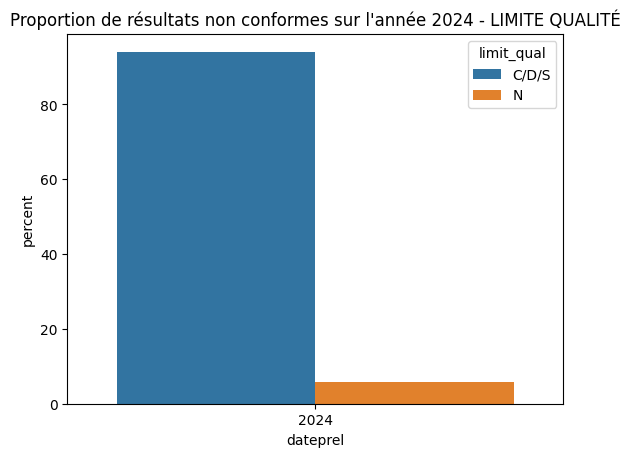

In [390]:
sns.countplot(comm_prel_uniques, x=comm_prel_uniques["dateprel"].dt.year, hue="limit_qual", stat = 'percent')
plt.title("Proportion de résultats non conformes sur l'année 2024 - LIMITE QUALITÉ")

In [392]:
comm_prel_uniques["limit_qual"].value_counts(normalize = True)

limit_qual
C/D/S    0.940881
N        0.059119
Name: proportion, dtype: float64

Text(0.5, 1.0, "Proportion de résultats non conformes sur l'année 2024 - RÉFÉRENCE QUALITÉ")

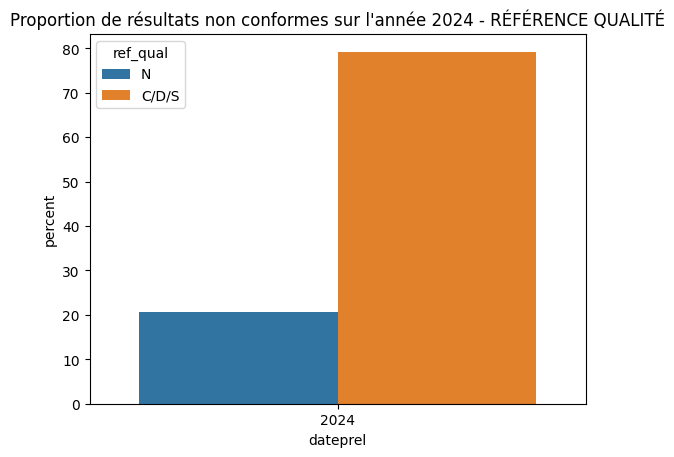

In [391]:
sns.countplot(comm_prel_uniques, x=comm_prel_uniques["dateprel"].dt.year, hue="ref_qual", stat = 'percent')
plt.title("Proportion de résultats non conformes sur l'année 2024 - RÉFÉRENCE QUALITÉ")

In [25]:
comm_prel_uniques[comm_prel_uniques['limit_qual'] == 'N']['plvconformitebacterio'].value_counts(normalize = True)*100 #plvconformitechimique

plvconformitebacterio
C    40.413534
N    30.092810
S    29.493656
Name: proportion, dtype: float64

In [26]:
comm_prel_uniques[comm_prel_uniques['limit_qual'] == 'N']['plvconformitechimique'].value_counts(normalize = True)*100

plvconformitechimique
N    70.706062
C    29.282190
D     0.011748
Name: proportion, dtype: float64

### TEST: AGGREGER AU MOIS ? 
***
On peut avoir plusieurs relevés par mois pour une commune.


In [33]:
# Possible d'avoir plusieurs prélèvements dans un même mois ? 
#comm_prel_uniques[comm_prel_uniques['nomcommuneprinc'] == 'AMBRONAY']['dateprel']


0     2024-01-23
49    2024-02-13
70    2024-03-13
419   2024-04-05
440   2024-05-13
461   2024-06-11
482   2024-07-08
510   2024-08-20
531   2024-09-11
552   2024-10-18
573   2024-11-25
594   2024-12-26
Name: dateprel, dtype: datetime64[us]

In [35]:
#comm_prel_uniques['test_month_prel'] = comm_prel_uniques['dateprel'].dt.month

/var/folders/sb/kbw95mq10b76gs1b7tjqtbgm0000gn/T/ipykernel_19368/3663363596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_prel_uniques['test_month_prel'] = comm_prel_uniques['dateprel'].dt.month


In [394]:
#comm_prel_uniques.groupby(['inseecommuneprinc', 'test_month_prel'])['referenceprel'].count().reset_index()

,inseecommuneprinc,test_month_prel,referenceprel
0,01001,2,1
1,01001,6,1
2,01001,10,1
3,01002,2,1
4,01002,3,1
...,...,...,...
156745,99001,8,2
156746,99001,9,2
156747,99001,10,2
156748,99001,11,2


In [395]:
#comm_prel_uniques[comm_prel_uniques['inseecommuneprinc'] == '99001']['dateprel'].unique()
# Exemple de cette commune où on a plusieurs relevés par mois

<DatetimeArray>
['2024-01-16 00:00:00', '2024-02-28 00:00:00', '2024-03-15 00:00:00',
 '2024-03-28 00:00:00', '2024-04-05 00:00:00', '2024-04-26 00:00:00',
 '2024-05-24 00:00:00', '2024-05-13 00:00:00', '2024-06-12 00:00:00',
 '2024-06-21 00:00:00', '2024-07-02 00:00:00', '2024-08-07 00:00:00',
 '2024-07-18 00:00:00', '2024-08-26 00:00:00', '2024-09-02 00:00:00',
 '2024-09-19 00:00:00', '2024-10-02 00:00:00', '2024-10-22 00:00:00',
 '2024-11-06 00:00:00', '2024-11-26 00:00:00', '2024-12-04 00:00:00',
 '2024-12-17 00:00:00']
Length: 22, dtype: datetime64[us]

In [46]:

#comm_prel_uniques['dateprel_simplified'] = comm_prel_uniques['dateprel'].astype(str).str[:7]

/var/folders/sb/kbw95mq10b76gs1b7tjqtbgm0000gn/T/ipykernel_19368/2174346568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_prel_uniques['dateprel_simplified'] = comm_prel_uniques['dateprel'].astype(str).str[:7]


## DEPASSEMENT SEUILS: CHECKS DIVERS AVANT ANALYSES
***
QUERYS SQL ET PYTHON
* Nombre paramètres: 1324 QUANT et 13 QUAL
* Comment juger de la conformité des var qualitatives (pas toujours clair, exemple 'ODEUR SAVEUR (QUALITATIF)' prend les valeurs 0,1,2)
* __/!\ 467 variables numérique sans aucune valeurs de référence !__
* __/!\ valeurs seuils diffèrent pour (NITRITES (EN NO2))__

### (draft) tests divers...

In [94]:
param = tuple(result_prelev['libmajparametre'].unique())



In [81]:
param = 'NITRITES (EN NO2)'

result_prelev[result_prelev['libmajparametre'] == param]['limitequal'].unique().tolist()


['<=0,5 mg/L', '<=0,1 mg/L']

In [110]:
# Créer un df ou dictionnaire où pour chaque paramètre, on associe une liste des valeurs seuils. 

i = 0

seuils_param = {}

for mol in result_prelev['libmajparametre'].unique():
    if i >=2:
        break
    #print(param)
    valeurs_seuils = result_prelev[result_prelev['libmajparametre'] == mol]['limitequal'].unique().tolist()
    seuils_param[mol] = valeurs_seuils
    i += 1

    

# Ok mais trop long en python, on passe en SQL. 

In [111]:
seuils_param

{'ACÉNAPHTÈNE': [None], 'ACRYLAMIDE': ['<=0.1 µg/L']}

### Nombre variables QUAL / QUANT

In [356]:
con.sql("""
    SELECT qualitparam, count(distinct libmajparametre) 
    FROM sise_prelevements prel
    JOIN sise_resultats res ON res.referenceprel = prel.referenceprel
    GROUP BY qualitparam
""").show()

┌─────────────┬─────────────────────────────────┐
│ qualitparam │ count(DISTINCT libmajparametre) │
│   varchar   │              int64              │
├─────────────┼─────────────────────────────────┤
│ N           │                            1324 │
│ O           │                              13 │
└─────────────┴─────────────────────────────────┘



### Traitement des variables qualitatives ?

In [383]:
con.sql("""
    SELECT distinct on (libmajparametre)
    libmajparametre, 
    array_agg(distinct rqana) as resultats
    FROM sise_prelevements prel
    JOIN sise_resultats res ON res.referenceprel = prel.referenceprel
    WHERE qualitparam = 'O'
    GROUP BY libmajparametre
""").to_df()

# Interprétation ?


,libmajparametre,resultats
0,SAVEUR (QUALITATIF),"[Aucun changement anormal, Non mesuré, Changem..."
1,PRÉSENCE DE CYANOBACTÉRIES (O/N),"[Absence cyanobactéries, Présence cyanobactéries]"
2,PRÉLÈVEMENT SOUS ACRÉDITATION,[OUI]
3,DISPO. INTÉRIEUR TRAITEMENT,[Pas de dipositif de traitement]
4,EQUILIBRE CALCOCARBONIQUE 0/1/2/3/4,"[A l'équilibre, Légèrement incrustante, Légère..."
5,ODEUR SAVEUR (QUALITATIF),"[0, 2, 1]"
6,ESCHERICHIA COLI (DÉTECTION),[ABSENCE ECOLI (colilert)]
7,SALMONELLA SPP (PRES/ABS) / 1L,[ABSENCE]
8,HYDROGÈNE SULFURÉ (QUALITATIF),[Absence d'odeur sulfurée]
9,SALMONELLA SPP (PRES/ABS) / 5L,[ABSENCE]


In [358]:
con.sql("""
    SELECT distinct limitequal
    FROM sise_prelevements prel
    JOIN sise_resultats res ON res.referenceprel = prel.referenceprel
    WHERE qualitparam = 'O'
""").show()

# Pas de ref pour les variables QUAL

┌────────────┐
│ limitequal │
│  varchar   │
├────────────┤
│ NULL       │
└────────────┘



### /!\ Variables sans valeurs seuil de référence 

In [363]:
con.sql("""
    SELECT 
        count(distinct libmajparametre) as param_num_sans_seuils 
    FROM sise_prelevements prel
    JOIN sise_resultats res ON res.referenceprel = prel.referenceprel
    WHERE qualitparam = 'N' AND limitequal IS NULL AND refqual IS NULL
    --GROUP BY libmajparametre, limitequal
""").show()

┌───────────────────────┐
│ param_num_sans_seuils │
│         int64         │
├───────────────────────┤
│                   467 │
└───────────────────────┘



In [384]:
con.sql("""
    SELECT 
        distinct libmajparametre
    FROM sise_prelevements prel
    JOIN sise_resultats res ON res.referenceprel = prel.referenceprel
    WHERE qualitparam = 'N' AND limitequal IS NULL AND refqual IS NULL
    --GROUP BY libmajparametre, limitequal
""").show()

┌─────────────────────────────────────┐
│           libmajparametre           │
│               varchar               │
├─────────────────────────────────────┤
│ DIMÉTHÉNAMIDE ESA                   │
│ ESA METOLACHLORE                    │
│ METOLACHLOR NOA 413173              │
│ OXA METAZACHLORE                    │
│ ACTIVITÉ ALPHA GLOBALE EN BQ/L      │
│ LEGIONELLA SP                       │
│ DICHLOROÉTHYLÈNE-1,1                │
│ DICHLOROÉTHYLÈNE-1,2 CIS            │
│ ACIDE PERFLUOROBUTANOÏQUE           │
│ ACIDE PERFLUORODECANE SULFONIQUE    │
│            ·                        │
│            ·                        │
│            ·                        │
│ CALOTHRIX SP (BIOVOLUME)            │
│ TRICHODESMIUM SP (BIOVOLUME)        │
│ BENZENE, 1-ETHYL-2-METHYL-          │
│ 2,2-DIMETHYLBUTANE                  │
│ 2,3-DIMETHYLPENTANE                 │
│ 2-METHYLPENTANE                     │
│ DECANE                              │
│ PENTANE                             │


### Valeurs seuils qui diffèrent pour un même paramètre (NITRITES (EN NO2))

In [140]:
# count distinct limite equal par param 
# voir ceux qui en ont plusieurs => compter
# sortir des exemples complets (avec nom de ville)

con.sql("""
    SELECT 
        libmajparametre, 
        count(distinct limitequal) as nb_seuils
    FROM sise_prelevements prel
    JOIN sise_resultats res ON res.referenceprel = prel.referenceprel
    WHERE limitequal IS NOT NULL
    GROUP BY libmajparametre
    ORDER BY 2 DESC
""").show()


┌────────────────────────────────────────────────────────┬───────────┐
│                    libmajparametre                     │ nb_seuils │
│                        varchar                         │   int64   │
├────────────────────────────────────────────────────────┼───────────┤
│ NITRITES (EN NO2)                                      │         2 │
│ HYDROCARBURES POLYCYCLIQUES AROMATIQUES (4 SUBSTANCES) │         1 │
│ DIFÉNOCONAZOLE                                         │         1 │
│ NAPROPAMIDE                                            │         1 │
│ PYRIMICARBE                                            │         1 │
│ PYRACLOSTROBINE                                        │         1 │
│ IODOSULFURON-METHYL-SODIUM                             │         1 │
│ DICHOROPHÈNE                                           │         1 │
│ COUMATÉTRALYL                                          │         1 │
│ BROMOPROPYLATE                                         │         1 │
│     

In [143]:
result_prelev[result_prelev['libmajparametre'] == 'NITRITES (EN NO2)'][['nomcommuneprinc', 'dateprel', 'rqana', 'limitequal']]

,nomcommuneprinc,dateprel,rqana,limitequal
35,AMBRONAY,2024-01-23,"<0,02","<=0,5 mg/L"
308,AMBRONAY,2024-03-13,"<0,02","<=0,5 mg/L"
497,AMBRONAY,2024-07-08,"<0,02","<=0,5 mg/L"
609,AMBRONAY,2024-12-26,"<0,02","<=0,5 mg/L"
655,AMBLEON,2024-05-28,"<0,02","<=0,5 mg/L"
...,...,...,...,...
18773693,PAMANDZI,2024-01-09,"<0,05","<=0,1 mg/L"
18773809,PAMANDZI,2024-03-26,"<0,05","<=0,1 mg/L"
18773862,PAMANDZI,2024-06-04,"<0,05","<=0,1 mg/L"
18773939,PAMANDZI,2024-07-09,"<0,05","<=0,1 mg/L"


In [144]:
result_prelev[(result_prelev['libmajparametre'] == 'NITRITES (EN NO2)') & (result_prelev['limitequal'] == '<=0,5 mg/L')]['nomcommuneprinc'].unique() #<=0,1 mg/L, dateprel 

array(['AMBRONAY', 'AMBLEON', 'BOZ', ..., 'DEMBENI', 'BANDRELE', 'BOUENI'],
      shape=(16435,), dtype=object)

In [145]:
result_prelev[(result_prelev['libmajparametre'] == 'NITRITES (EN NO2)') & (result_prelev['limitequal'] == '<=0,1 mg/L')]['nomcommuneprinc'].unique() #<=0,1 mg/L, dateprel 


array(['ROUSSES (LES)', 'MACON', 'VALSERHONE', ..., 'KANI-KELI',
       'CHICONI', 'CHIRONGUI'], shape=(7378,), dtype=object)

### Check homogénéité unité par paramètre

In [148]:
# Checks unités 

con.sql("""
    SELECT 
        libmajparametre, 
        count(distinct cdunitereferencesiseeaux) as nb_unite
    FROM sise_prelevements prel
    JOIN sise_resultats res ON res.referenceprel = prel.referenceprel
    WHERE limitequal IS NOT NULL
    GROUP BY libmajparametre
    ORDER BY 2 DESC
""").show()

# Ok toutes les unités sont équivalentes par paramètre

┌───────────────────────────┬──────────┐
│      libmajparametre      │ nb_unite │
│          varchar          │  int64   │
├───────────────────────────┼──────────┤
│ ACLONIFEN                 │        1 │
│ DICHLOROMONOBROMOMÉTHANE  │        1 │
│ AZIPROTRYNE               │        1 │
│ TRIFLUSULFURON-METHYL     │        1 │
│ THIOFANOX SULFOXYDE       │        1 │
│ ALLYXYCARBE               │        1 │
│ CHLORTHIOPHOS             │        1 │
│ METHIOCARB SULFOXYDE      │        1 │
│ BENZO(A)PYRÈNE *          │        1 │
│ BENZÈNE                   │        1 │
│    ·                      │        · │
│    ·                      │        · │
│    ·                      │        · │
│ BROMOXYNIL OCTANOATE      │        1 │
│ DIMÉTHOATE                │        1 │
│ ETHEPHON                  │        1 │
│ THIAZFLURON               │        1 │
│ TRITICONAZOLE             │        1 │
│ SAA ACÉTOCHLORE           │        1 │
│ BROMOPHOS MÉTHYL          │        1 │
│ TRICHLOROPHÉNO

### Check cohérence unités valeurs relevées vs valeurs de références

In [238]:
import re

pat1 = '[0-9]+'
pat2 = '<='
combined_pat = r'|'.join((pat1, pat2))

result_prelev['unit_reference_seuil'] = result_prelev['limitequal'].str.replace(combined_pat, '', regex=True)

result_prelev['unit_reference_seuil'] = result_prelev['unit_reference_seuil'].str.replace(r'. ', '', regex=True)


. µg/L


In [245]:
result_prelev['unit_reference_seuil'].unique()

array([None, 'µg/L', ' µg/L', ' mg/L', ' n/(mL)', 'mg/L', ' µg(CN)/L',
       ' NG/(KPOIDCORPOREL/J)', ' NFU', ' NPP/mL', 'ng/L'], dtype=object)

In [246]:
result_prelev['cdunitereferencesiseeaux'].unique()

array(['µg/L', 'SANS OBJET', 'n/(100mL)', 'µS/cm', 'mg(Cl2)/L', 'mg/L',
       'mg(Pt)/L', 'n/mL', 'unité pH', '°C', 'NFU', 'Bq/L', 'mg(C)/L',
       'µg(CN)/L', 'mSv/a', '°f', 'n/(100L)', 'mm/48h',
       'NG/(KG POIDS CORPOREL/J)', 'mm3/L', 'n(cellules)/mL', 'mg(CO2)/L',
       'mg(CO3)/L', 'mg(O2)/L', '%', 'mg(P2O5)/L', 'mg(SiO2)/L',
       'NPP/100mL', 'UG/L', 'n', 'mg(H2S)/L', 'UFC/L', 'µg(ClO2)/L',
       'ng/L', 'mg(PO4)/L', 'Abs/m', 'n/(10L)', 'n/(5L)',
       'n(colonies)/mL', 'n/(250mL)'], dtype=object)

In [264]:
diff = result_prelev[ (result_prelev['qualitparam'] == 'QUANT') &
(result_prelev['cdunitereferencesiseeaux'] != result_prelev['unit_reference_seuil'])][['libmajparametre', 'cdunitereferencesiseeaux', 'unit_reference_seuil', 'limitequal']]




In [265]:
diff = diff.fillna(value=np.nan)

In [267]:
diff.dropna(inplace = True)

In [272]:
diff.groupby('cdunitereferencesiseeaux')['unit_reference_seuil'].value_counts()

cdunitereferencesiseeaux  unit_reference_seuil
NFU                       NFU                      25841
NG/(KG POIDS CORPOREL/J)  NG/(KPOIDCORPOREL/J)       697
NPP/100mL                 NPP/mL                     104
mg/L                      mg/L                    271918
n/(100mL)                 n/(mL)                  767073
µg(CN)/L                  µg(CN)/L                 24499
µg/L                      µg/L                    558494
Name: count, dtype: int64

__OK pour les unités des valeurs recensées VS valeurs de référence.__

In [274]:
result_prelev['limitequal'].unique() #forcément inférieur ou égal

array([None, '<=0.1 µg/L', '<=0.01 µg/L', '<=5 µg/L', '<=0.5 µg/L',
       '<=50 µg/L', '<=2 mg/L', '<=0 n/(100mL)', '<=0,1 µg/L',
       '<=20 µg/L', '<=0,5 mg/L', '<=50 mg/L', '<=1 mg/L', '<=10 µg/L',
       '<=3 µg/L', '<=0,03 µg/L', '<=1 µg/L', '<=1,5 mg/L', '<=100 µg/L',
       '<=50 µg(CN)/L', '<=0,5 µg/L', '<=6 µg/L', '<=0,25 mg/L',
       '<=0,7 mg/L', '<=5 NG/(KG POIDS CORPOREL/J)', '<=0,1 mg/L',
       '<=1 NFU', '<=0 NPP/100mL', '<=30 µg/L', '<=250 µg/L',
       '<=700 µg/L', '<=2,5 µg/L', '<=2,4 mg/L', '<=0,1 ng/L',
       '<=50.0 µg/L', '<=60 µg/L'], dtype=object)

## [TO RUN] DEPASSEMENT DES SEUILS: CLEANING ET ANALYSES
***
FOCUS SUR LIMITES QUALITE plutôt que RÉFÉRENCES QUALITÉ
FOCUS VAR QUANTITATIVES.

CLEANING/VARIABLE CREATION:
* Suppressions des cas sans valeurs de références
* Extraction des valeurs de référence pour comparaison. 
* Variable __valtraduite__ à comparer aux valeurs extraites de __limitequal__
* __Création d'une variable "depassement_seuil": boolean qui prend pour valeur True si la valeur relevée > valeur de référence, False sinon__

RÉSULTATS:
* 108 variables dont la valeur > seuil 
* __TOP 5: CHLOROTHALONIL R471811; CHLORIDAZONE DESPHÉNYL; CHLORATE; CHLORIDAZONE MÉTHYL DESPHÉNYL; CHLORIDAZONE MÉTHYL DESPHÉNYL__
* __TOP 5 COMMUNES DEPASSEMENT: CAEN; SAINT-CONTEST; WAVRIN; BELPECH; BOSROBERT__

### Cleaning / Extract

In [292]:
quant_compare_seuil = result_prelev[result_prelev['qualitparam'] == 'QUANT'].dropna(subset = 'limitequal')


In [294]:
quant_compare_seuil['val_reference_limite'] = quant_compare_seuil['limitequal'].str.split(expand = True)[0]
quant_compare_seuil['unit_reference_limit'] = quant_compare_seuil['limitequal'].str.split(expand = True)[1]

In [300]:
quant_compare_seuil['val_reference_limite'] = quant_compare_seuil['val_reference_limite'].str.replace('<=', '', regex=True)

In [318]:
quant_compare_seuil['val_reference_limite'] = quant_compare_seuil['val_reference_limite'].str.replace(',', '.', regex=True)

In [319]:
quant_compare_seuil['val_reference_limite'] = quant_compare_seuil['val_reference_limite'].astype(float)

In [305]:
quant_compare_seuil.head()

,inseecommuneprinc,nomcommuneprinc,referenceprel,dateprel,conclusionprel,plvconformitebacterio,plvconformitechimique,plvconformitereferencebact,plvconformitereferencechim,qualitparam,libmajparametre,rqana,cdunitereferencesiseeaux,limitequal,refqual,valtraduite,limit_qual,ref_qual,val_reference_limite,unit_reference_limit
1,01007,AMBRONAY,00100139034,2024-01-23,Eau d'alimentation conforme aux limites de qua...,C,C,N,C,QUANT,ACRYLAMIDE,"<0,10",µg/L,<=0.1 µg/L,NaN,0.0,C/D/S,N,0.1,µg/L
4,01007,AMBRONAY,00100139034,2024-01-23,Eau d'alimentation conforme aux limites de qua...,C,C,N,C,QUANT,BENZO(A)PYRÈNE *,"<0,0001",µg/L,<=0.01 µg/L,NaN,0.0,C/D/S,N,0.01,µg/L
5,01007,AMBRONAY,00100139034,2024-01-23,Eau d'alimentation conforme aux limites de qua...,C,C,N,C,QUANT,BENZO(B)FLUORANTHÈNE,"<0,0005",µg/L,<=0.1 µg/L,NaN,0.0,C/D/S,N,0.1,µg/L
7,01007,AMBRONAY,00100139034,2024-01-23,Eau d'alimentation conforme aux limites de qua...,C,C,N,C,QUANT,"BENZO(G,H,I)PÉRYLÈNE","<0,00050",µg/L,<=0.1 µg/L,NaN,0.0,C/D/S,N,0.1,µg/L
8,01007,AMBRONAY,00100139034,2024-01-23,Eau d'alimentation conforme aux limites de qua...,C,C,N,C,QUANT,BENZO(K)FLUORANTHÈNE,"<0,0005",µg/L,<=0.1 µg/L,NaN,0.0,C/D/S,N,0.1,µg/L


### Variable depassement_seuil

In [320]:
quant_compare_seuil['depassement_seuil'] = np.where((quant_compare_seuil['valtraduite'] > quant_compare_seuil['val_reference_limite'])
                                                    , True, False)



In [324]:
quant_compare_seuil[quant_compare_seuil['depassement_seuil'] == True][['libmajparametre', 'valtraduite', 'val_reference_limite']].sample(n = 5)


,libmajparametre,valtraduite,val_reference_limite
4681408,CHLOROTHALONIL R471811,0.546,0.1
11421032,CHLORIDAZONE DESPHÉNYL,0.247,0.1
3351783,CHLOROTHALONIL R471811,0.656,0.1
9073066,ARSENIC,15.300,10.0
4718222,CHLOROTHALONIL R471811,0.114,0.1


### Résultats

In [328]:
quant_compare_seuil[quant_compare_seuil['depassement_seuil'] == True]['libmajparametre'].nunique()

108

In [329]:
quant_compare_seuil[quant_compare_seuil['depassement_seuil'] == True]['libmajparametre'].unique()

array(['ESCHERICHIA COLI /100ML - MF', 'ANTHRAQUINONE (PESTICIDE)',
       'ENTÉROCOQUES /100ML-MS', 'CHLOROFORME',
       'TRIHALOMÉTHANES (4 SUBSTANCES)', 'PLOMB', 'DIMÉTHÉNAMIDE',
       'MÉTOLACHLORE', 'CHLOROTHALONIL R471811',
       'TOTAL DES PESTICIDES ANALYSÉS', 'BENZO(A)PYRÈNE *',
       'BENZO(B)FLUORANTHÈNE',
       'HYDROCARBURES POLYCYCLIQUES AROMATIQUES (4 SUBSTANCES)',
       'CHLORURE DE VINYL MONOMÈRE', 'NITRATES (EN NO3)',
       'CHLORIDAZONE DESPHÉNYL', 'CHLORIDAZONE MÉTHYL DESPHÉNYL',
       'FLUORURES MG/L', 'CHLOROTHALONIL R417888', 'MÉTAZACHLORE',
       'ATRAZINE DÉSÉTHYL', 'DINOTERBE', 'AMPA', 'QUIMERAC', 'ATRAZINE',
       'BROMATES', 'NITRATES/50 + NITRITES/3', 'TERBUTRYNE',
       'SOMME DE 20 PFAS', '2-AMINOSULFONYL-N,N-DIMETHYLNICOTIN',
       '2,6 DICHLOROBENZAMIDE', 'TURBIDITÉ NÉPHÉLOMÉTRIQUE NFU', 'NICKEL',
       'ARSENIC', 'CHLORITES EN CAS DE TRAITEMENT POUVANT EN GÉNÉRER',
       'ATRAZINE DÉSÉTHYL DÉISOPROPYL', 'DIMÉTHACHLORE OXA',
       'IMIDAC

In [333]:
distirb_val_depassement = quant_compare_seuil[quant_compare_seuil['depassement_seuil'] == True].groupby('libmajparametre')['valtraduite'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).reset_index()


In [334]:
distirb_val_depassement 
# ajouter valeurs de référence...


,libmajparametre,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
0,"2,4-D",2.0,0.135000,0.021213,0.120,0.1230,0.12750,0.135,0.1425,0.1470,0.14970,0.150
1,"2,4-MCPA",2.0,0.313000,0.000000,0.313,0.3130,0.31300,0.313,0.3130,0.3130,0.31300,0.313
2,"2,6 DICHLOROBENZAMIDE",11.0,0.130909,0.022563,0.110,0.1100,0.11000,0.120,0.1500,0.1600,0.16900,0.170
3,"2-AMINOSULFONYL-N,N-DIMETHYLNICOTIN",9.0,0.135000,0.015289,0.117,0.1234,0.12500,0.132,0.1390,0.1454,0.16844,0.171
4,ACRYLAMIDE,20.0,0.376950,0.153294,0.140,0.1580,0.27475,0.420,0.5100,0.5410,0.55000,0.550
...,...,...,...,...,...,...,...,...,...,...,...,...
103,TERBUTRYNE,1.0,0.122000,NaN,0.122,0.1220,0.12200,0.122,0.1220,0.1220,0.12200,0.122
104,THIAZFLURON,2.0,0.130000,0.014142,0.120,0.1220,0.12500,0.130,0.1350,0.1380,0.13980,0.140
105,TOTAL DES PESTICIDES ANALYSÉS,3254.0,1.703089,1.811875,0.501,0.5730,0.70300,1.035,1.9360,3.4816,9.33156,20.082
106,TRIHALOMÉTHANES (4 SUBSTANCES),90.0,126.600000,28.524267,100.390,102.9350,108.30000,115.550,134.8750,159.0990,216.38810,235.710


In [372]:
proportions_param_nc = quant_compare_seuil.groupby('libmajparametre')['depassement_seuil'].value_counts(normalize = True).reset_index()

In [374]:
proportions_param_nc.sort_values(by = ['depassement_seuil', 'proportion'], ascending = False)

,libmajparametre,depassement_seuil,proportion
201,CHLOROTHALONIL R471811,True,0.492993
178,CHLORIDAZONE DESPHÉNYL,True,0.224839
161,CHLORATE,True,0.219101
180,CHLORIDAZONE MÉTHYL DESPHÉNYL,True,0.125590
199,CHLOROTHALONIL R417888,True,0.118324
...,...,...,...
198,CHLOROTHALONIL R417888,False,0.881676
179,CHLORIDAZONE MÉTHYL DESPHÉNYL,False,0.874410
160,CHLORATE,False,0.780899
177,CHLORIDAZONE DESPHÉNYL,False,0.775161


In [377]:
quant_compare_seuil[quant_compare_seuil['depassement_seuil'] == True].groupby('libmajparametre')['inseecommuneprinc'].count().reset_index().sort_values(by = 'inseecommuneprinc', ascending = False)



,libmajparametre,inseecommuneprinc
32,CHLOROTHALONIL R471811,6297
26,CHLORIDAZONE DESPHÉNYL,5174
57,ESCHERICHIA COLI /100ML - MF,3893
54,ENTÉROCOQUES /100ML-MS,3550
105,TOTAL DES PESTICIDES ANALYSÉS,3254
...,...,...
37,CLOMAZONE,1
89,PHTHALIMIDE,1
88,PETHOXAMIDE,1
76,MÉTAMITRONE,1


In [382]:
# Cas avec dépassements de seuils. 
quant_compare_seuil[quant_compare_seuil['depassement_seuil'] == True].groupby(['inseecommuneprinc', 'nomcommuneprinc'])['referenceprel'].count().reset_index().sort_values(by = 'referenceprel', ascending = False)

# ajout le nomb de molecules différentes avec dépassement.

,inseecommuneprinc,nomcommuneprinc,referenceprel
1183,14118,CAEN,156
1239,14566,SAINT-CONTEST,135
4198,59653,WAVRIN,120
1030,11033,BELPECH,109
1963,27095,BOSROBERT,96
...,...,...,...
2216,2A268,SAMPOLO,1
4776,62845,VERLINCTHUN,1
2220,2A282,SOCCIA,1
4771,62836,VAUDRICOURT,1


# Interrogations / Informations suite aux premières analyses et à la première réunion de travail

INFOS SUPP SUITE REUNION: 
* On ne tient PAS compte des variables qualitatives (très gros focus sur les pesticides notamment). 
* Dans le livrable: bilan 2020-2024
* Attention trier les données sur eau acheminée (en aval donc) ? => vérifier que c'est bien le cas dans les tables. 
* On voudrait les VMAX établies par l'ANSES (revoir doc..)
* /!\ Niveaux de gravité sur la présentation de Pauline => notamment durée de non conformité.
* Arrêté: https://www.legifrance.gouv.fr/loda/id/JORFTEXT000000465574/2020-10-22/

ANALYSES A RETRAVAILLER:
* Rapport les top mol/communes au nombre de prélèvements par molécules / communes pour avoir la proportion réelle...
* Voir comment représenter la distrib valeurs relevées vs valeurs conformes / valeurs de référence 

ANALYSES FUTURES: 

* aller plus loin, par prélèvement: combinaison de molécules, corrélations, fréquences...
* carte de dépassement de seuil...
.
* inclure résultats pour les références qualité ? (jusqu'ici seulement limites)
* Affiner les analyses: intégrer les dérogations dans les conformités (mais que 1%...)
* Par région: type / nb de molécules recherchées et fréquences des relevés.
* Historique 2020-2024 avec notamment évolution des seuils ? 

RECHERCHES:
* Etude __valtraduite__ et exploitabilité (vs __rqana__) 
* cf présentation résultats: exploitabilité réelle de prélevements ? cf analyses UDI..                                                
